# Module 9: Estimation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import altair as alt
import pandas as pd
import scipy.stats as ss
%matplotlib inline 

## Kernel density estimation

Some resources on KDE: http://yyahnwiki.appspot.com/Kernel%20density%20estimation

Let's import the IMDb data.

In [2]:
import vega_datasets

movies = vega_datasets.data.movies()
movies.head()

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross
0,None,None,Gramercy,6.1,1071.0,R,None,8000000.0,12-Jun-98,NaN,NaN,None,The Land Girls,NaN,146083.0,146083.0
1,None,None,Strand,6.9,207.0,R,Drama,300000.0,7-Aug-98,NaN,NaN,None,"First Love, Last Rites",NaN,10876.0,10876.0
2,None,None,Lionsgate,6.8,865.0,None,Comedy,250000.0,28-Aug-98,NaN,NaN,None,I Married a Strange Person,NaN,203134.0,203134.0
3,None,None,Fine Line,NaN,NaN,None,Comedy,300000.0,11-Sep-98,13.0,NaN,None,Let's Talk About Sex,NaN,373615.0,373615.0
4,Contemporary Fiction,None,Trimark,3.4,165.0,R,Drama,1000000.0,9-Oct-98,62.0,NaN,Original Screenplay,Slam,NaN,1009819.0,1087521.0


In [3]:
movies = movies.dropna(subset=['IMDB_Rating', 'Rotten_Tomatoes_Rating'])

We can plot histogram and KDE using pandas:

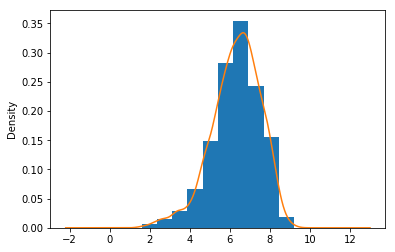

In [4]:
movies['IMDB_Rating'].hist(bins=10, density=True)
movies['IMDB_Rating'].plot(kind='kde')

Or using seaborn:

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


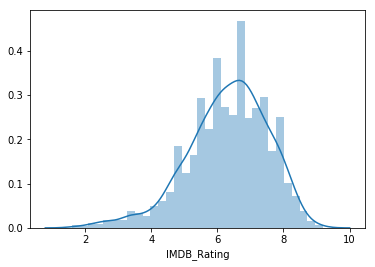

In [5]:
sns.distplot(movies['IMDB_Rating'])

Ah, too many bins.. 😎

**Q: Can you plot the histogram and KDE of the `Rotten_Tomatoes_Rating`?**

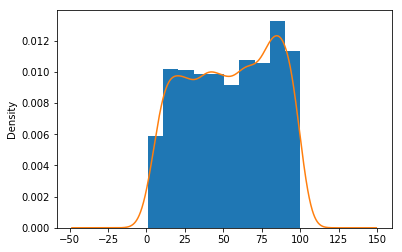

In [6]:
# TODO: implement this using pandas
movies['Rotten_Tomatoes_Rating'].hist(bins = 10 ,density=True)
movies['Rotten_Tomatoes_Rating'].plot(kind = 'kde')

We can get a random sample using the pandas' [**`sample()`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html) function. The [**`kdeplot()`**](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html) function in seaborn provides many options (like kernel types) to do KDE. Let's sample some data points and see how does KDE plot changes with the size of the samples. 

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


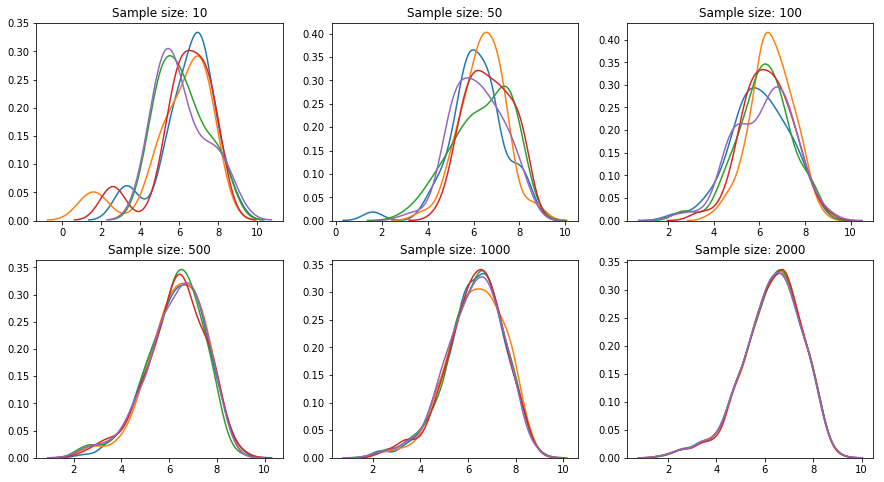

In [7]:
f = plt.figure(figsize=(15,8))
plt.xlim(0, 10)

sample_sizes = [10, 50, 100, 500, 1000, 2000]
for i, N in enumerate(sample_sizes, 1):
    plt.subplot(2,3,i)
    plt.title("Sample size: {}".format(N))
    for j in range(5):
        s = movies['IMDB_Rating'].sample(N)
        sns.kdeplot(s, kernel='gau', legend=False)

Let's try all kernel types supported by seaborn's `kdeplot()`. Plot the same 2x3 grid with all kernels: https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot To see how do the kernels look like, just sample 2 data points and plot them. 

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


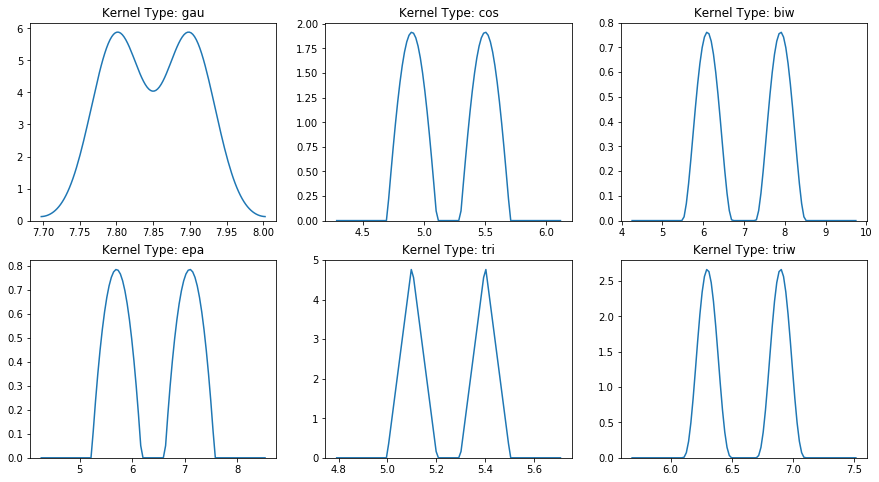

In [8]:
# Implement here
f = plt.figure(figsize=(15,8))
plt.xlim(0, 10)

sample_sizes = [10, 50, 100, 500, 1000, 2000]

for i, k in enumerate(["gau", "cos", "biw", "epa", "tri", "triw"], 1):
    plt.subplot(2,3,i)
    plt.title("Kernel Type: {}".format(k))
    s = movies['IMDB_Rating'].sample(2)
    sns.kdeplot(s, kernel=k, legend = False)

**Q: We can also play with the bandwidth option. Make sure to set the `xlim` so that all plots have the same x range, so that we can compare. **

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


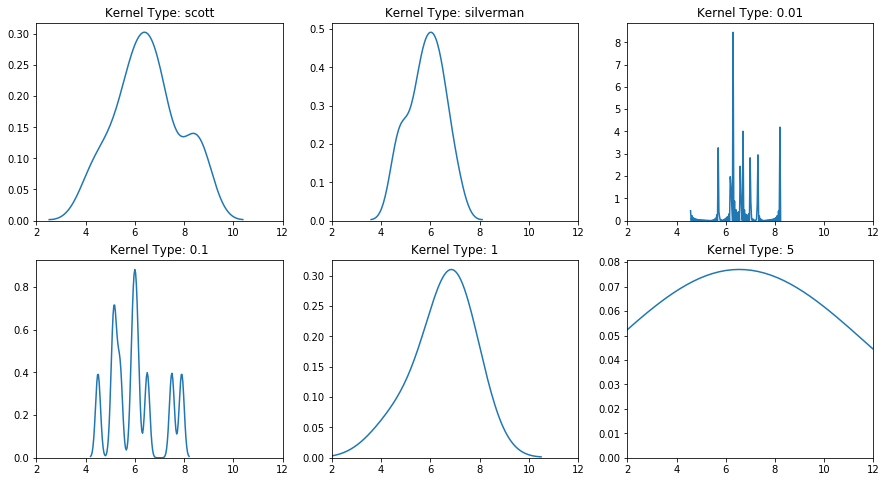

In [9]:
f = plt.figure(figsize=(15,8))
plt.xlim(2, 10)
bw = ['scott', 'silverman', 0.01, 0.1, 1, 5]
sample_size = 10
kernel = 'gau'

# Implement here
for i, b in enumerate(bw, 1):
    plt.subplot(2,3,i)
    plt.title("Kernel Type: {}".format(b))
    s = movies['IMDB_Rating'].sample(sample_size)
    sns.kdeplot(s, kernel="gau", bw=b, legend=False)
    plt.xlim(2, 12)

**Q: What's your takeaway? Explain how bandwidth affects the result of your visualization. **

It is really hard to find the exact number of bins required for each dataset. 
But having the right amount of bins is imperative to a good visualization

## Interpolation

One area where interpolation is used a lot is image processing. Play with it!

https://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html

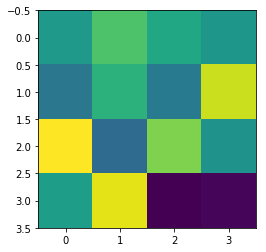

In [10]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
np.random.seed(0)
grid = np.random.rand(4, 4)

plt.imshow(grid, interpolation=None, cmap='viridis')

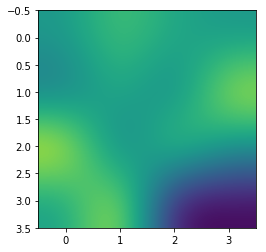

In [11]:
plt.imshow(grid, interpolation='bicubic', cmap='viridis')

Let's look at some time series data. 

In [12]:
co2 = vega_datasets.data.co2_concentration()
co2.head()

,Date,CO2
0,1958-03-01,315.70
1,1958-04-01,317.46
2,1958-05-01,317.51
3,1958-07-01,315.86
4,1958-08-01,314.93


In [13]:
co2.Date.dtype

dtype('O')

The `Date` colume is stored as strings. Let's convert it to `datetime` so that we can manipulate. 

In [14]:
pd.to_datetime(co2.Date).head()

0   1958-03-01
1   1958-04-01
2   1958-05-01
3   1958-07-01
4   1958-08-01
Name: Date, dtype: datetime64[ns]

In [15]:
co2.Date = pd.to_datetime(co2.Date)

In [16]:
co2.set_index('Date', inplace=True)
co2.head()

,CO2
Date,
1958-03-01,315.70
1958-04-01,317.46
1958-05-01,317.51
1958-07-01,315.86
1958-08-01,314.93


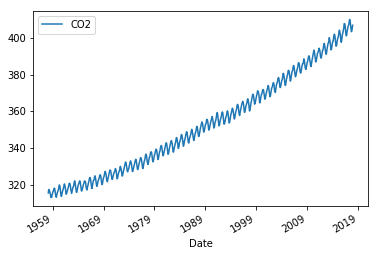

In [17]:
co2.plot()

😢

In [18]:
recent_co2 = co2.tail(8)

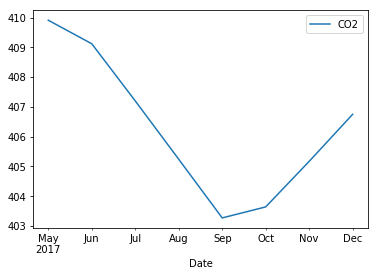

In [19]:
recent_co2.plot()

This standard line chart above can be considered as a chart with linear interpolation between data points. 

The data contains measurements at the resolution of about a month. Let's up-sample the data. This process create new rows that fill the gap between data points. However, because we don't know what to put in the `CO2`, it puts `NaN`. 

In [20]:
upsampled = recent_co2.resample('D').mean()
upsampled

,CO2
Date,
2017-05-01,409.91
2017-05-02,NaN
2017-05-03,NaN
2017-05-04,NaN
2017-05-05,NaN
2017-05-06,NaN
2017-05-07,NaN
2017-05-08,NaN
2017-05-09,NaN


In [21]:
upsampled = recent_co2.resample('D').mean()
upsampled.head(35)

,CO2
Date,
2017-05-01,409.91
2017-05-02,NaN
2017-05-03,NaN
2017-05-04,NaN
2017-05-05,NaN
2017-05-06,NaN
2017-05-07,NaN
2017-05-08,NaN
2017-05-09,NaN


Now we can interpolate and fill the gaps. If we do `linear` interpolation, we get the exactly same plot, but just with more points. 

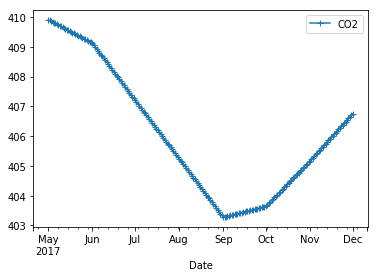

In [22]:
recent_co2.resample('D').interpolate(method='linear').plot(style='+-')

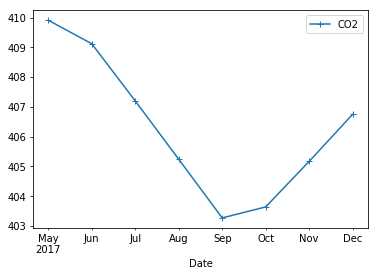

In [23]:
recent_co2.plot(style='+-')

`Nearest` interpolation is just a process of assigning the nearest value to each missing rows. 

**Q: resample `recent_co2` with 'day' resolution, and then interpolate with `nearest` method, and plot with the `recent_co2`'s actual data points. Useful options are `style='...'`, `ms=...`, and `ax=...`** 

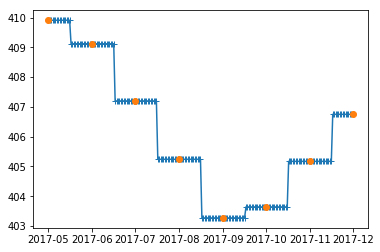

In [24]:
# implement 
res = recent_co2.resample('D').interpolate(method='nearest')
plt.plot(res, '+-')
plt.plot(recent_co2, 'o')

**Q: then let's try `polynomial` interpolation with `order=3`.**

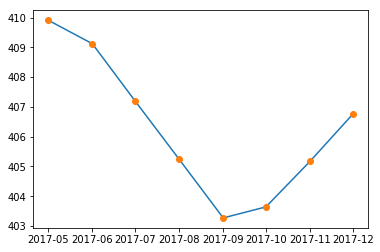

In [25]:
# implement
res = recent_co2.interpolate(method='polynomial', order = "3")
plt.plot(res)
plt.plot(recent_co2, 'o')

## Moving average

Pandas has a nice method called `rolling()`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html

It lets you do operations on the `rolling` windows. For instance, if you want to calculate the moving average, you can simply

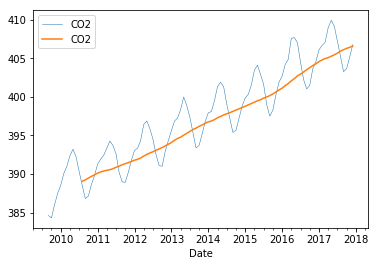

In [26]:
ax = co2[-100:].plot(lw=0.5)
co2[-100:].rolling(12).mean().plot(ax=ax)

By default, it consider every data point inside each window equally (`win_type=None`) but there are many window types supported by `scipy`. Also by default, the mean value is put at the right end of the window (trailing average).  

**Q: can you create a plot with `triang` window type and centered average? **

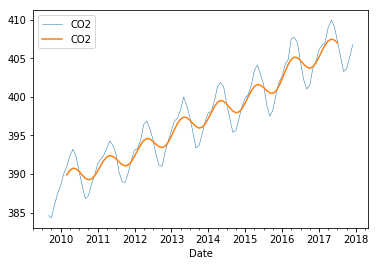

In [27]:
# Implement here
ax = co2[-100:].plot(lw=0.5)
co2[-100:].rolling(12, win_type='triang', center = True).mean().plot(ax=ax)

# Examining relationsips

Remember [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)? Actually, the dataset is not only included in `vega_datasets` but also in `seaborn`. 


In [28]:
df = sns.load_dataset("anscombe")
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


All four datasets are in this single data frame and the 'dataset' indicator is one of the columns. This is a form often called [tidy data](http://vita.had.co.nz/papers/tidy-data.pdf), which is easy to manipulate and plot. In tidy data, each row is an observation and columns are the properties of the observation. Seaborn makes use of the tidy form. Using seaborn's `lmplot`, you can very quickly examine relationships between variables, separated by some facets of the dataset. 

/usr/local/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


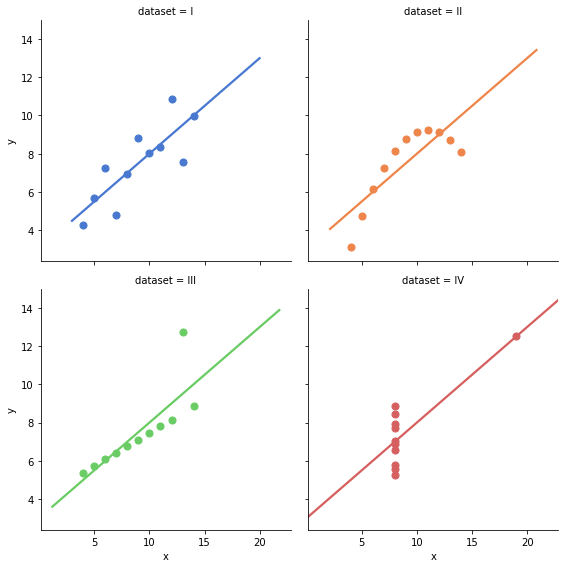

In [29]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

**Q: So let's look at the relationship between `IMDB_Rating` and `Rotten_Tomatoes_Rating` in the `movies` dataset, separated with respect to `MPAA_Rating`. Put 4 plots in a row. **

/usr/local/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


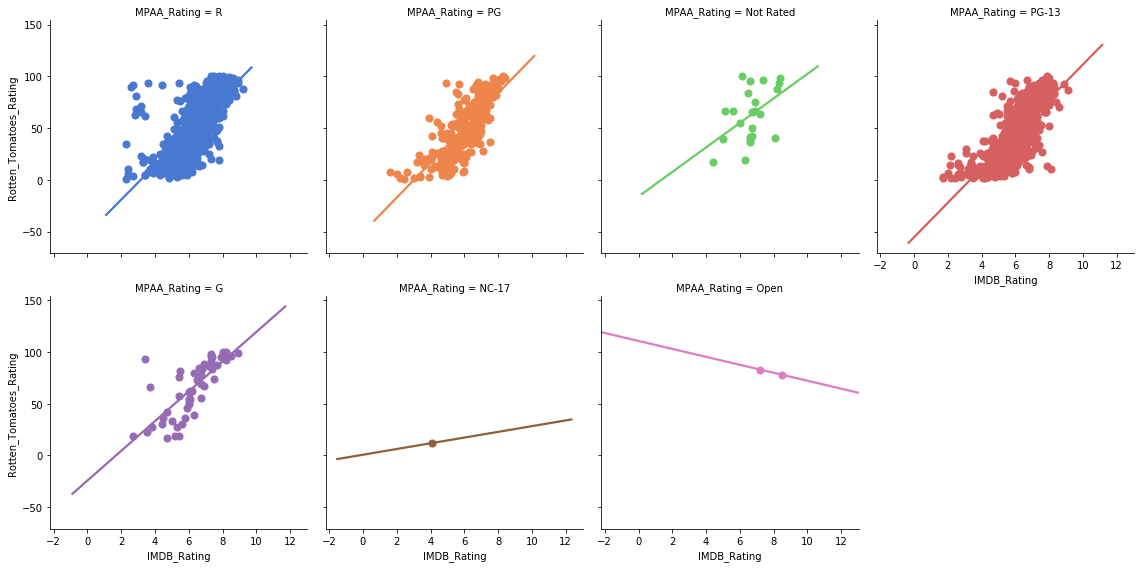

In [30]:
# implement 
sns.lmplot(x="IMDB_Rating", y="Rotten_Tomatoes_Rating", col="MPAA_Rating", hue="MPAA_Rating", data=movies,
           col_wrap=4, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

Another useful method for examining relationships is [**`jointplot()`**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html), which produces a scatter plot with two marginal histograms. 

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


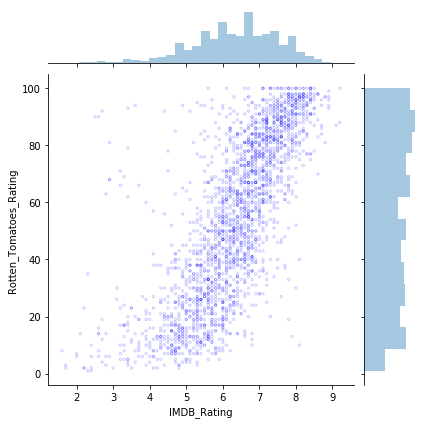

In [31]:
g = sns.jointplot(movies['IMDB_Rating'], movies['Rotten_Tomatoes_Rating'], s=5, alpha=0.2, facecolors='none', edgecolors='b')

## Hexbin density plot

In 2D, *heatmap* can be considered as a color-based histogram. You divide the space into bins and show the frequency with colors. A common binning method is the hexagonal bin. 

We can again use the [**`jointplot()`**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html) and setting the `kind` to be `hexbin`. 

**Q: Can you create one?**

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


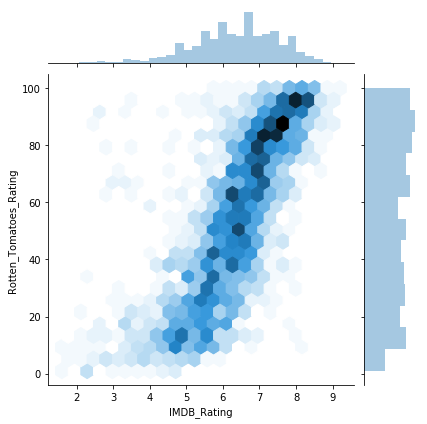

In [32]:
# implement
g = sns.jointplot(movies['IMDB_Rating'], movies['Rotten_Tomatoes_Rating'], kind = "hexbin")

## 2D KDE

We can also do 2D KDE using seaborn's [**`kdeplot()`**](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html) function. 

**Q: Can you draw one like this? (this `cmap` is called `Reds`) **

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


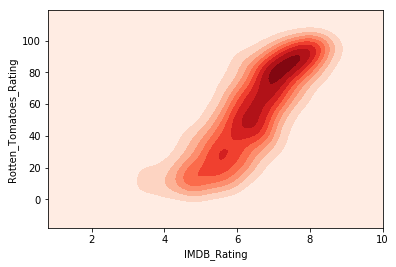

In [33]:
# implement 
sns.kdeplot(movies['IMDB_Rating'], movies['Rotten_Tomatoes_Rating'], cmap = "Reds", shade = "True")

Or again using [**`jointplot()`**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html) by setting the `kind` parameter. Look, we also have the 1D marginal KDE plots!

**Q: create jointplot with KDE**

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


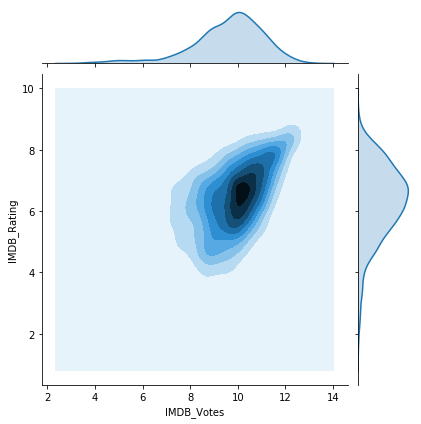

In [34]:
# implement
g = sns.jointplot(np.log(movies['IMDB_Votes']), movies['IMDB_Rating'], kind = "kde", shade = True)